# Assignment 2

In [36]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2, f

df = pd.read_stata('Integration.dta')

**Problem 1**

In [37]:
#1a)

print(df.groupby(["mand","ankomstaar"]).mean(),df.groupby(["mand","aar"]).mean())

                          id      alder       aarslon     aar
mand ankomstaar                                              
0.0  2014.0      1237.834351  28.263313  35516.187500  2017.5
     2015.0      1273.078369  29.457830  39055.218750  2017.5
     2016.0      1148.300049  29.700001  32056.531250  2017.5
1.0  2014.0      1224.220825  29.293375  86439.882812  2017.5
     2015.0      1164.515747  29.204809  78438.179688  2017.5
     2016.0      1195.490967  29.022455  64219.292969  2017.5                       id   ankomstaar      alder       aarslon
mand aar                                                      
0.0  2017.0  1220.713135  2014.981812  28.628283  31124.437500
     2018.0  1220.713135  2014.981812  29.628283  40045.046875
1.0  2017.0  1195.247803  2015.017822  28.670341  61324.046875
     2018.0  1195.247803  2015.017822  29.670341  90906.500000


In [38]:
#1b)
df['ln_aarslon']=np.log(df.aarslon)
df['YSM']=df.aar-df.ankomstaar

df_2017 = df[df.aar == 2017]
df_2017

model1 = smf.ols('ln_aarslon ~ alder + YSM', data=df_2017).fit(cov='HC1')
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_aarslon   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     39.84
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           9.53e-18
Time:                        09:55:02   Log-Likelihood:                -1639.8
No. Observations:                2400   AIC:                             3286.
Df Residuals:                    2397   BIC:                             3303.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4231      0.047    219.799      0.0

In [39]:
#1c)
df_2017['ysm_alder']=df_2017.YSM-df_2017.alder

model1_1 = smf.ols('ln_aarslon ~ alder + ysm_alder', data=df_2017).fit(cov='HC1')
print(model1_1.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_aarslon   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     39.84
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           9.53e-18
Time:                        09:55:02   Log-Likelihood:                -1639.8
No. Observations:                2400   AIC:                             3286.
Df Residuals:                    2397   BIC:                             3303.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4231      0.047    219.799      0.0

/var/folders/04/kjvjnqjn149dn1gb5x3g65tc0000gn/T/ipykernel_30783/848573217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['ysm_alder']=df_2017.YSM-df_2017.alder


In [41]:
#2a)
model2 = smf.ols('ln_aarslon ~ alder + YSM + ankomstaar', data=df).fit(cov='HC1')
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_aarslon   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     125.4
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           3.61e-78
Time:                        09:55:08   Log-Likelihood:                -4102.0
No. Observations:                4800   AIC:                             8212.
Df Residuals:                    4796   BIC:                             8238.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -457.8689     38.818    -11.795      0.0

**Opgave 3**

In [33]:
#3a)
df['alder2']=(df.alder)**2
df['YSM2']=(df.YSM)**2
df['kohorte15']=df.ankomstaar == 2015
df['kohorte16']=df.ankomstaar == 2016

model3 = smf.ols('ln_aarslon ~ alder + alder2 + YSM + YSM2 + kohorte15 + kohorte16', data=df).fit(cov='HC1')
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_aarslon   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     114.6
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          1.48e-135
Time:                        11:31:37   Log-Likelihood:                -3961.5
No. Observations:                4800   AIC:                             7937.
Df Residuals:                    4793   BIC:                             7982.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.0633      0.12

In [34]:
ftest = model3.f_test(['alder2','YSM2'])
ftest

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=130.92052698790454, p=4.371899066283873e-56, df_denom=4.79e+03, df_num=2>

In [35]:
df_men = df[df.mand == 1]
df_men

model3 = smf.ols('ln_aarslon ~ alder + alder2 + YSM + YSM2 + kohorte15 + kohorte16', data=df_men).fit(cov='HC1')
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_aarslon   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     177.9
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          4.13e-200
Time:                        11:31:37   Log-Likelihood:                -2372.5
No. Observations:                3810   AIC:                             4759.
Df Residuals:                    3803   BIC:                             4803.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.9376      0.11

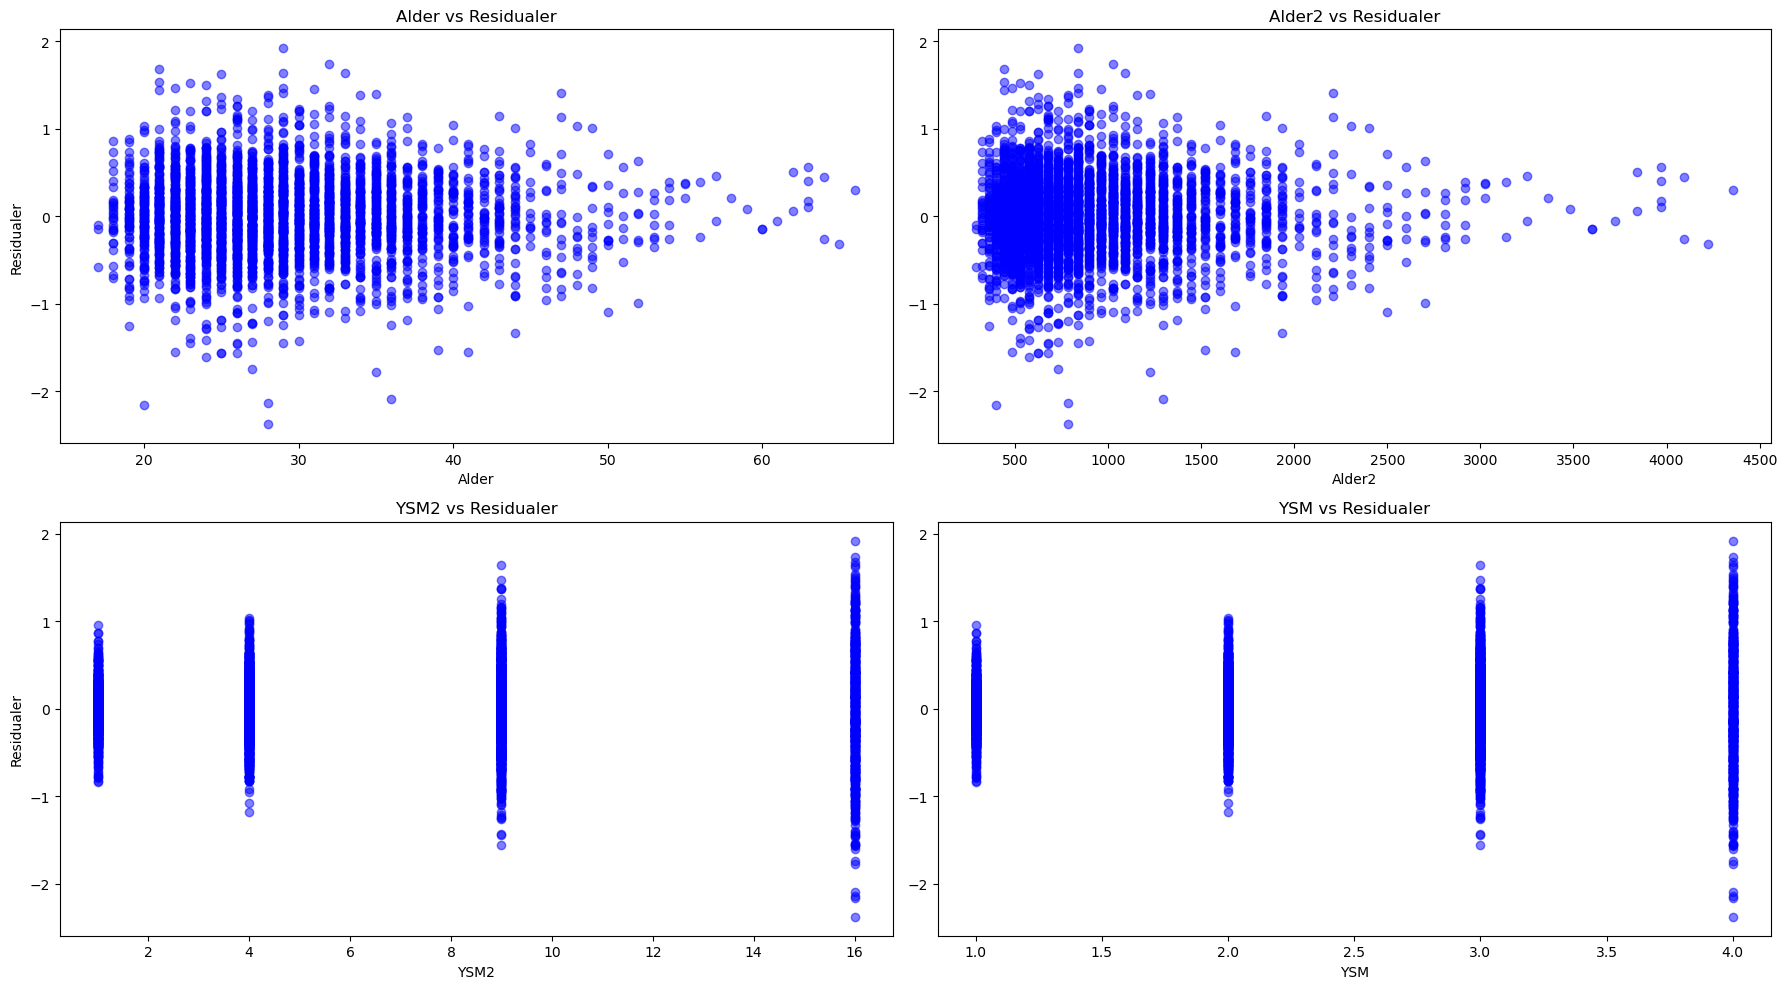

In [76]:
import matplotlib.pyplot as plt

# Opret en figur med 6 subplots (2 rækker og 3 kolonner)
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Tilføj scatterplots til hver subplot
axes[0, 0].scatter(df_men.alder, model3.resid, color='blue', alpha=0.5)
axes[0, 0].set_title('Alder vs Residualer')
axes[0, 0].set_xlabel('Alder')
axes[0, 0].set_ylabel('Residualer')

axes[0, 1].scatter(df_men.alder2, model3.resid, color='blue', alpha=0.5)
axes[0, 1].set_title('Alder2 vs Residualer')
axes[0, 1].set_xlabel('Alder2')

axes[1, 1].scatter(df_men.YSM, model3.resid, color='blue', alpha=0.5)
axes[1, 1].set_title('YSM vs Residualer')
axes[1, 1].set_xlabel('YSM')

axes[1, 0].scatter(df_men.YSM2, model3.resid, color='blue', alpha=0.5)
axes[1, 0].set_title('YSM2 vs Residualer')
axes[1, 0].set_xlabel('YSM2')
axes[1, 0].set_ylabel('Residualer')



# Juster afstanden mellem plots for bedre læsbarhed
plt.tight_layout()

# Vis plottet
plt.show()


In [178]:
u2= (model3.resid)**2

model3_1 = smf.ols('u2 ~ alder + alder2 + YSM + YSM2 + kohorte15 + kohorte16', data=df_men).fit(cov='HC1')

print(model3_1.summary())

                            OLS Regression Results                            
Dep. Variable:                     u2   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     100.0
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          3.47e-117
Time:                        15:14:41   Log-Likelihood:                -1359.8
No. Observations:                3810   AIC:                             2734.
Df Residuals:                    3803   BIC:                             2777.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1333      0.08

In [181]:
hypotheses = '(alder = alder2 = YSM = YSM2 = 0)'
f_test = model3_1.f_test(hypotheses)
print(f_test)

<F test: F=60.47398089084709, p=1.3661511869964444e-49, df_denom=3.8e+03, df_num=4>


In [194]:
def simulate():

	## Step 1. Definer parameterværdier
	n = 1000
	beta0 = 2
	beta1 = 3
	beta2 = -1
	beta3 = -1

	# Step 2. Simular data
	x1 = np.random.normal(1,2, size=n) 
	x2 = np.random.normal(1,2, size=n) 
	x3 = np.random.normal(1,2, size=n) 
	eps = np.random.normal(0, 1/2*x1**2, size=n) 
	y = beta0 + beta1*x1 + beta2*x2 + beta3*x3 + eps

	## Step 3: Estimer SLR modellen (y ~ x1)
	X = pd.DataFrame({'x1': x1}) 
	X = sm.add_constant(X)
	SLR_model = sm.OLS(y, X)
	SLR_results = SLR_model.fit(cov_type='HC1')
	beta1_SLR = SLR_results.params['x1'] # Gemmer beta1 fra SLR-estimatet

	# Step 4: Estimer MLR modellen (y ~ x1 + x2)
	X = pd.DataFrame({'x1': x1, 'x2': x2, 'x3':x3})
	X = sm.add_constant(X)
	MLR_model = sm.OLS(y, X)
	MLR_results = MLR_model.fit(cov_type='HC1')
	beta1_MLR = MLR_results.params['x1'] # Gemmer beta1 fra MLR-estimatet

	return beta1_SLR, beta1_MLR



In [195]:
def monte_carlo(reps=1000):
	np.random.seed(0) # Sæt seed så vi får samme tilfældige resultater hver gang
	SLR_results = [] # Liste til at gemme beta1 resultater fra SLR
	MLR_results = [] # Liste til at gemme beta1 resultater fra MLR

	for rep in range(reps): # Kør simulationen "reps" antal gange
		beta1_MLR, beta1_SLR = simulate()
		SLR_results.append(beta1_MLR)
		MLR_results.append(beta1_SLR)

	results = pd.DataFrame({'beta1_SLR': SLR_results, 'beta1_MLR': MLR_results})

	return results

results = monte_carlo()
results.describe()

,beta1_SLR,beta1_MLR
count,1000.000000,1000.000000
mean,3.002847,3.001703
std,0.141075,0.136152
min,2.440306,2.538102
25%,2.906813,2.909759
50%,3.003496,2.998724
75%,3.102586,3.093645
max,3.425805,3.436891


In [170]:
1.96*0.141075+3

print(3-1.96*0.141075)



print(results[results.beta1_SLR>3.276507].shape)
print(results[results.beta1_SLR<2.723493].shape)


2.723493
(20, 2)
(23, 2)


In [215]:
def simulate():

	## Step 1. Definer parameterværdier
	n = 50
	beta0 = 2
	beta1 = 3
	beta2 = -1
	beta3 = -1

	# Step 2. Simular data
	x1 = np.random.normal(1,2, size=n) 
	x2 = np.random.normal(1,2, size=n) 
	x3 = np.random.normal(1,2, size=n) 
	eps = np.random.normal(0, 1/2*x1**2, size=n) 
	y = beta0 + beta1*x1 + beta2*x2 + beta3*x3 + eps

	## Step 3: Estimer SLR modellen (y ~ x1)
	X = pd.DataFrame({'x1': x1}) 
	X = sm.add_constant(X)
	SLR_model = sm.OLS(y, X)
	SLR_results = SLR_model.fit()
	beta1_SLR = SLR_results.params['x1'] # Gemmer beta1 fra SLR-estimatet

	# Step 4: Estimer MLR modellen (y ~ x1 + x2)
	X = pd.DataFrame({'x1': x1, 'x2': x2, 'x3':x3})
	X = sm.add_constant(X)
	MLR_model = sm.WLS(y, X,1/x1**2)
	MLR_results = MLR_model.fit()
	beta1_MLR = MLR_results.params['x1'] # Gemmer beta1 fra MLR-estimatet

	return beta1_SLR, beta1_MLR

def monte_carlo(reps=1000):
	np.random.seed(0) # Sæt seed så vi får samme tilfældige resultater hver gang
	SLR_results = [] # Liste til at gemme beta1 resultater fra SLR
	MLR_results = [] # Liste til at gemme beta1 resultater fra MLR

	for rep in range(reps): # Kør simulationen "reps" antal gange
		beta1_MLR, beta1_SLR = simulate()
		SLR_results.append(beta1_MLR)
		MLR_results.append(beta1_SLR)

	results = pd.DataFrame({'beta1_SLR': SLR_results, 'beta1_MLR': MLR_results})

	return results

results = monte_carlo()
results.beta1_MLR.describe()

count    1000.000000
mean        3.003770
std         0.165610
min         2.410172
25%         2.892537
50%         3.004763
75%         3.112430
max         3.575743
Name: beta1_MLR, dtype: float64

In [211]:
def simulate():

	## Step 1. Definer parameterværdier
	n = 50
	beta0 = 2
	beta1 = 3
	beta2 = -1
	beta3 = -1

	# Step 2. Simular data
	x1 = np.random.normal(1,2, size=n)
	x1_ny = 2*x1/x1**2
	x2 = np.random.normal(1,2, size=n) 
	x2_ny = 2*x2/x1**2
	x3 = np.random.normal(1,2, size=n) 
	x3_ny = 2*x3/x1**2
	eps = np.random.normal(0, 1/2*x1**2, size=n) 
	y = beta0*2/x1**2 + beta1*x1_ny + beta2*x2_ny + beta3*x3_ny + 2*eps/x1**2

	## Step 3: Estimer SLR modellen (y ~ x1)
	X = pd.DataFrame({'x1': x1}) 
	X = sm.add_constant(X)
	SLR_model = sm.WLS(y, X)
	SLR_results = SLR_model.fit()
	beta1_SLR = SLR_results.params['x1'] # Gemmer beta1 fra SLR-estimatet

	# Step 4: Estimer MLR modellen (y ~ x1 + x2)
	X = pd.DataFrame({'x1': x1_ny, 'x2': x2_ny, 'x3':x3_ny})
	X = sm.add_constant(X)
	MLR_model = sm.WLS(y, X, 1)
	MLR_results = MLR_model.fit()
	beta1_MLR = MLR_results.params['x1'] # Gemmer beta1 fra MLR-estimatet

	return beta1_SLR, beta1_MLR

def monte_carlo(reps=1000):
	np.random.seed(0) # Sæt seed så vi får samme tilfældige resultater hver gang
	SLR_results = [] # Liste til at gemme beta1 resultater fra SLR
	MLR_results = [] # Liste til at gemme beta1 resultater fra MLR

	for rep in range(reps): # Kør simulationen "reps" antal gange
		beta1_MLR, beta1_SLR = simulate()
		SLR_results.append(beta1_MLR)
		MLR_results.append(beta1_SLR)

	results = pd.DataFrame({'beta1_SLR': SLR_results, 'beta1_MLR': MLR_results})

	return results

results = monte_carlo()
results.describe()

,beta1_SLR,beta1_MLR
count,1.000000e+03,1000.000000
mean,5.913621e+02,2.800523
std,3.921945e+04,33.477857
min,-3.780153e+05,-594.308482
25%,-1.061284e+01,-1.435464
50%,9.844483e-01,3.408072
75%,1.539250e+01,7.979917
max,1.022112e+06,260.962302
